# Decision Trees
Using an algorithm in Sklearn (CART), we generate a decision tree as follows:

First, we should import the required modules as follows:

In [1]:
import sklearn.datasets as datasets
from sklearn import metrics, model_selection, preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import set_option
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline 

# Load the Iris Data and Explore it

In [2]:
# Load data as DataFrame
df = pd.read_csv('Data/iris.csv')

In [3]:
# Check the shape of DataFrame
df.shape

(150, 5)

In [4]:
# Show the top five rows
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Show the information of DataFrame (Data Columns, Types, ...)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
# Set the decimal precision
set_option('precision', 2)
# Generate descriptive statistics  
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [7]:
# Verify there is no missing value in data
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
# Check the number of classes in target 
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
# Check target for imbalanced classes
df.species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

In [10]:
# Using the following code, one can convert the target column to Numeric
df['class_label'] = df.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
#
# Alternative Method:
# df['class_label']= pd.factorize(df['species'])[0]
# df['class_label'], _= pd.factorize(df['class'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,class_label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109cc2550>,
      dtype=object)

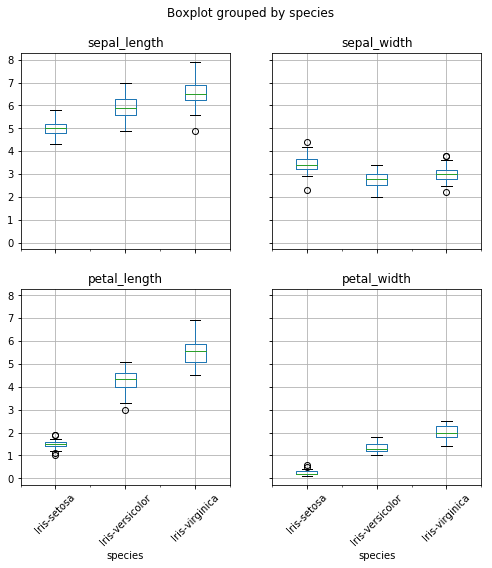

In [11]:
# Box plot of all numeric columns, grouped by species
feature=["sepal_length", "sepal_width", "petal_length", "petal_width"]
df.boxplot(column=feature, by='species', rot=45, figsize=(8,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f0ac1d0>,
      dtype=object)

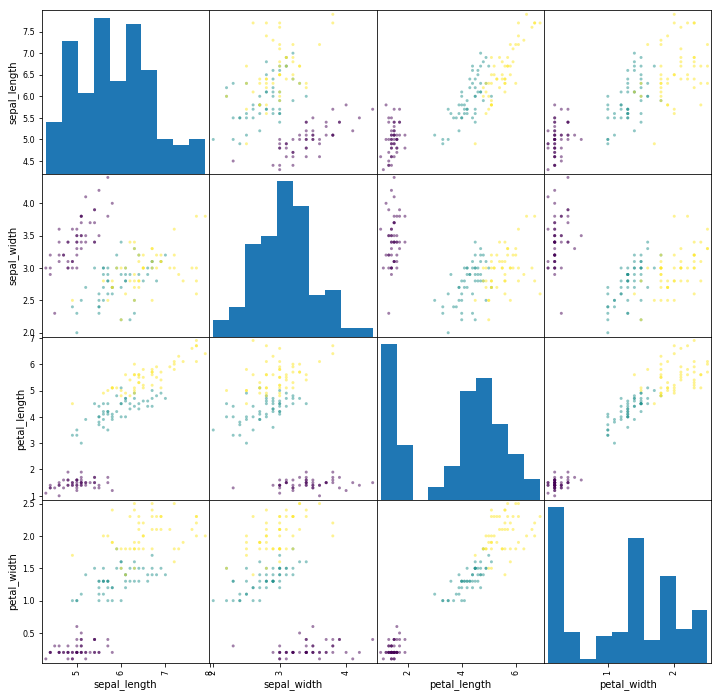

In [12]:
# Scatter matrix of all features, colored by species
pd.plotting.scatter_matrix(df.drop(["species", "class_label"], axis=1), c=df.class_label, figsize=(12, 12))

In [13]:
# Drop target column
feature=["sepal_length", "sepal_width", "petal_length", "petal_width"]
X=df[feature]
#
## Alternative Method
# X= df.drop(["species", "class_label"], axis=1)
#
y=df["class_label"]

In [14]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class_label, dtype: int64

In [16]:
# Get the correlations between features
correlations = df.corr(method='pearson')
set_option('display.width', 150)
correlations

,sepal_length,sepal_width,petal_length,petal_width,class_label
sepal_length,1.00,-0.12,0.87,0.82,0.78
sepal_width,-0.12,1.00,-0.43,-0.37,-0.43
petal_length,0.87,-0.43,1.00,0.96,0.95
petal_width,0.82,-0.37,0.96,1.00,0.96
class_label,0.78,-0.43,0.95,0.96,1.00


### Standardize the Features

In [17]:
# Is it necessary to standardize the features in Decision Tree? 
sc = preprocessing.StandardScaler()
sc.fit(X)
X= sc.transform(X)

In [18]:
## If training set and test set are different DataFrame
# sc = preprocessing.StandardScaler()
# sc.fit(X_train)
# X_train= sc.transform(X_train)
# X_test= sc.transform(X_test)

## Train and Test Sets

In [19]:
# split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

## Tain the Model

In [20]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Visualize

In [21]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
import pydotplus

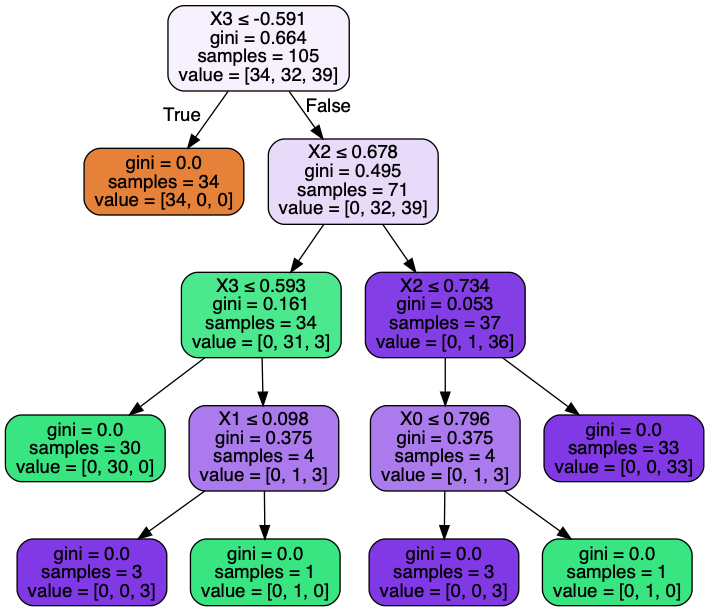

In [22]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Make predictions

Now, one can use this model to predict the test data

In [23]:
y_pred = clf.predict(X_test)

## Evaluate the Model

In [24]:
# Count the number of misclassifications
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

Misclassified samples: 1


In [25]:
# Evaluate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.98


## Visualize the Model's Decision Regions

In [26]:
feature_selected=["petal_length", "petal_width"]
X=df[feature_selected]
y=df["class_label"]

#### Train the Model Again!

In [27]:
clf=DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Convert DataFrame to Numpy Array

In [28]:
X=np.array(X)
y=np.array(y)

In [29]:
X.shape

(150, 2)

## Decision Regions

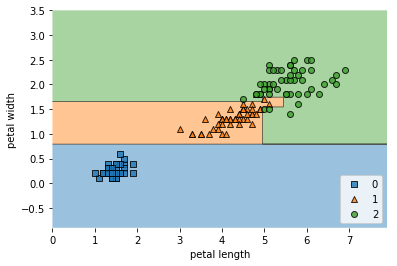

In [30]:
plot_decision_regions(X, y, clf=clf, legend=2)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='lower right')

## Learning Curve

([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.4,
  0.26666666666666666,
  0.022222222222222223,
  0.022222222222222223,
  0.022222222222222223,
  0.022222222222222223,
  0.022222222222222223,
  0.022222222222222223,
  0.022222222222222223,
  0.022222222222222223])

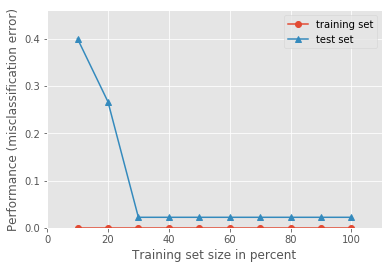

In [31]:
# Create training and test scores for various training set sizes
plot_learning_curves(X_train, y_train, X_test, y_test, clf, print_model=False, style='ggplot')

#### Learning Curve (Alternative Method)

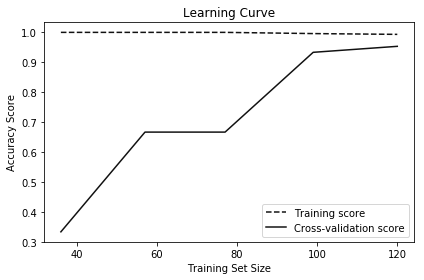

In [32]:
# Create training and test scores for various training set sizes
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(clf, X, y, cv=5, scoring='accuracy', 
                                                        train_sizes=np.linspace(0.3, 1.0, 5))
# Create means of training set scores and test set scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.tight_layout()